# Introduction:
> Models are only as useful as the quality of their predictions
> > fundamentally, our goal is not to create models (which is easy) but to create high-quality models (which is
hard).

# Cross-Validating Models
> One strategy might be to hold off a slice of data for testing.
>> This is called validation (or hold-out):
>> > In validation, our observations (features and targets) are split into two
sets, traditionally called the training set and the test set. We take the test set and put it
off to the side, pretending that we have never seen it before.<br><br>
>> > Next we train our model using our training set, using the features and target vector to teach the model how
to make the best prediction.
>______________________________________
> However, the validation approach has two major weaknesses:
> > 1. The performance of the model can be highly dependent on which few observations were selected for the test set.
> > 2. The model is not being trained using all the available data, and it’s not being evaluated on all the available data.
> _________________________________________
> A better strategy, which overcomes these weaknesses, is called `k-fold cross-validation
(KFCV)`:
> > 1. In KFCV, we split the data into k parts called folds. The model is then trained using k – 1 folds (combined into one training set) and then the last fold is used as a test set.
> > 2. We repeat this k times, each time using a different fold as the test set.
> > 3. The performance on the model for each of the k iterations is then averaged to produce an overall measurement.
> ___________________________________
> 2 key points:
> > 1. KFCV assumes that each observation was created independently from the other (i.e., the data is independent and `identically distributed [IID]`).
> > > If the data is IID, it is a good idea to `shuffle observation`s when assigning to folds. In scikit-learn we can set `shuffle=True` to perform shuffling.
> > 2. when we are using KFCV to evaluate a classifier, it is often beneficial to have folds containing roughly the same percentage of observations from each of the different target classes (called `stratified k-fold`).
> > > **Example:** if our `target vector` contained gender and 80% of the observations were male, then each fold would contain 80% male and 20% female observations.
> > > - In scikit-learn, we can conduct stratified k-fold cross-validation by replacing the `KFold` class with `StratifiedKFold`.
> ______________________________________________
> cross_val_score 3 parameters:
>> 1. cv:
>>> `cv` determines our cross-validation technique. K-fold is the most common by far, but there are others, such as `leave-one-out cross-validation` where the number of folds k equals the number of data points in the set.
>> 2. scoring:
>>> `scoring` defines the metric for success.
>> 3. n_jobs=-1:
>>> `n_jobs=-1` tells scikit-learn to use every core available. For example, if your computer has four cores (a common number for laptops), then scikit-learn will use all four cores at once to speed up the operation.

In [3]:
# If you want to evaluate how well your classification model generalizes to unforeseen data.
# Just reate a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
# Load digits dataset
digits = datasets.load_digits()
# Create features matrix
features = digits.data
# Create target vector
target = digits.target
# Create standardizer
standardizer = StandardScaler()
# Create logistic regression object
logit = LogisticRegression()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores
# Calculate mean
cv_results.mean()

0.9677329000309502

- Our goal is not to evaluate how well the model does on our training data, but how well it does on data it has never seen before
(e.g., a new customer, a new crime, a new image).

In [5]:
# we conducted k-fold cross-validation using five folds and outputted the evaluation scores to cv_results:
# View score for all 5 folds
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

> - Finally, when we are using validation sets or cross-validation, it is important to preprocess data based on the training set and then apply those transformations to both the training and test set.
> > **Example:** when we fit our standardization object, standardizer, we calculate the mean and variance of only the training set. Then we
apply that transformation (using transform) to both the training and test sets:

In [6]:
# Import library
from sklearn.model_selection import train_test_split
# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
# Fit standardizer to training set
standardizer.fit(features_train)
# Apply to both training and test sets which can then be used to train models
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

- The reason for this is because we are pretending that the test set is unknown data.
If we fit both our preprocessors using observations from both training and test sets,
some of the information from the test set leaks into our training set. 

### `scikit-learn’s pipeline` package makes this easy to do while using cross-validation techniques. 

In [7]:
# We first create a pipeline that preprocesses the data (e.g., standardizer) and then trains a model (logistic regression, logit):
# Create a pipeline
pipeline = make_pipeline(standardizer, logit)

In [8]:
# Then we run KFCV using that pipeline and scikit does all the work for us:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

# Creating a Baseline Regression Model
> `DummyRegressor` allows us to create a very simple model that we can use as a baseline to compare against any other models that we train.
> > This can often be useful to simulate a “naive” existing prediction process in a product or system. 

In [10]:
# If you want a simple baseline regression model to use as a comparison against other models that you train,
# use scikit-learn’s DummyRegressor to create a simple model to use as a baseline:

# Load libraries
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Load data
wine = load_wine()
# Create features
features, target = wine.data, wine.target
# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')
# "Train" dummy regressor
dummy.fit(features_train, target_train)
# Get R-squared score
dummy.score(features_test, target_test)
# -0.0480213580840978

-0.0480213580840978

In [11]:
# To compare, we train our model and evaluate the performance score:
# Load library
from sklearn.linear_model import LinearRegression
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols.score(features_test, target_test)
# 0.804353263176954

0.8043532631769538

- By default, score returns the coefficient of determination (R-squared, R^2) score:
> 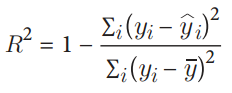
> - where $y_{i}$ is the true value of the target observation, $\hat{y_{i}}$ is the predicted value, and $\bar{y}$ is the mean value for the target vector.
>> - The closer $R^{2}$ is to 1, the more of the variance in the target vector that is explained by the features.

> - DummyRegressor uses the `strategy` parameter to set the method of making predictions, including the mean or median value in the training set.
> - Furthermore, if we set strategy to constant and use the `constant` parameter, we can set the dummy regressor to predict some constant value for every observation:

In [12]:
# Create dummy regressor that predicts 1s for everything
clf = DummyRegressor(strategy='constant', constant=1)
clf.fit(features_train, target_train)
# Evaluate score
clf.score(features_test, target_test)
# -0.06299212598425186

-0.06299212598425186

# Creating a Baseline Classification Model
> A common measure of a classifier’s performance is how much better it is than `random guessing`.
> > scikit-learn’s `DummyClassifier` makes this comparison easy.
> > - The strategy parameter gives us a number of options for generating values:
> > > 1. `stratified` makes predictions proportional to the class proportions of the training set’s target vector
> > > > **Example:** if 20% of the observations in the training data are women, then DummyClassifier will predict women 20% of the time).
> > > 2. `uniform` will generate predictions uniformly at random between the different classes.
> > > > **Example:** if 20% of observations are women and 80% are men, uniform will produce predictions that are 50% women and 50% men.

In [13]:
# If you want a simple baseline classifier to compare against your model,
# use scikit-learn’s DummyClassifier:

# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
# Load data
iris = load_iris()
# Create target vector and feature matrix
features, target = iris.data, iris.target
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
 features, target, random_state=0)
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Train" model
dummy.fit(features_train, target_train)
# Get accuracy score
dummy.score(features_test, target_test)
# 0.42105263157894735

0.42105263157894735

In [14]:
# By comparing the baseline classifier to our trained classifier, we can see the improvement:
# Load library
from sklearn.ensemble import RandomForestClassifier
# Create classifier
classifier = RandomForestClassifier()
# Train model
classifier.fit(features_train, target_train)
# Get accuracy score
classifier.score(features_test, target_test)
# 0.9736842105263158

0.9736842105263158

# Evaluating Binary Classifier Predictions
> For evaluating the quality of a trained classification model, scikit-learn’s `cross_val_score` will conduct cross-validation while using the
`scoring` parameter to define one of a number of performance metrics, including:
> # scoring (evaluation metric):
> > As an evaluation metric, accuracy has some valuable properties, especially its intuitiveness. However, better metrics often involve using some balance of `precision` and `recall` (a trade-off between the `optimism` and `pessimism`). `F1` presents a balance between the recall and precision, where the relative contributions of both are equal.
>>____________________________________
>> ## accuracy
>>> Accuracy is a common performance metric. It is simply the proportion of observations predicted correctly:<br>
>>> $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ <br>
>>>> - `TP:` The number of true positives. These are observations that are part of the positive class that we predicted correctly.
>>>> - `TN:` The number of true negatives. These are observations that are part of the negative class that we predicted correctly.
>>>> - `FP:` The number of false positives, also called a Type I error. These are observations that are predicted to be part of the positive class but are actually part of the negative class.
>>>> - `FN:` The number of false negatives, also called a Type II error. These are observations that are predicted to be part of the negative class but are actually part of the positive class.
>>______________________________
>> ## precision
>> > `Precision` is the proportion of every observation `predicted to be positive` that is `actually positive`. We can think about it as a measurement noise in our predictions (how likely we are to be right when we predict something is positive).
>> > - Models with high precision are `pessimistic` in that they predict an observation is of the positive class only when they are very certain about it.
>> >> **Formula:** $\frac{TP}{TP+FP}$
>>_________________________
>> ## recall
>> > Recall is the proportion of `every positive` observation that is `truly positive`.
>> > - Recall measures the `model’s ability to identify` an observation of the `positive class`.
>> > - Models with high recall are `optimistic` in that they have a low bar for predicting that an observation is in the positive class
>> > > **Formula:** $\frac{TP}{TP+FN}$
>>______________________
>> ## F1
>> > Almost always we want some kind of `balance between precision and recall`, and this role is filled by the F1 score.
>> > - The F1 score is the `harmonic mean` (a kind of average used for ratios),
>> > > **Formula:** $2\times\frac{Precision \times Recall}{Precision+Recall}$
>> > > - **Note:** This score is a measure of `correctness` achieved in `positive prediction` (how many are actually positive of observations labeled as positive)

In [2]:
# We can measure accuracy in three-fold (the default number of folds) cross-validation by setting scoring="accuracy":
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")
# array([0.9555, 0.95 , 0.9585, 0.9555, 0.956 ])

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

> - **Note:** When in the presence of imbalanced classes, accuracy suffers from a paradox where a model is highly accurate but lacks predictive power.
> > **Example:** imagine we are trying to predict the presence of a very rare cancer that occurs in 0.1% of the population. After training our model, we find the accuracy is at 95%. However, 99.9% of people do not have the cancer: if we simply created a model that “predicted” that nobody had that form of cancer, our naive model would be 4.9% more accurate, but it clearly is not able to predict anything.

> $\Longrightarrow$ For this reason, we are often motivated to use other metrics such as precision, recall, and the F1 score.

In [3]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")
# array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [4]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")
# array([0.951, 0.952, 0.953, 0.949, 0.951])

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [5]:
# Cross-validate model using F1
cross_val_score(logit, X, y, scoring="f1")
# array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [6]:
# As an alternative to using cross_val_score, if we already have the true y values and
# the predicted y values, we can calculate the metrics accuracy and recall directly:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)
# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)
# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

In [7]:
recall_score(y_test, y_hat)

0.9397590361445783

# Evaluating Binary Classifier Thresholds
> The `receiver operating characteristic curve` is a common method for evaluating the quality of a `binary classifier`.
> > - `ROC` compares the presence of `true positives` and `false positives` at `every probability threshold` (i.e., the probability at which an observation is predicted to be a class).
> > - By plotting the ROC curve, we can see how the model performs.
> > > - A `good` classifier that predicts every observation correctly would look like the solid light gray line in the ROC output in the figure bellow, going straight up to the top immediately.
> > > - A `bad` classifier that predicts at random will appear as the diagonal line.
>>>> The better the model, the closer it is to the solid line.

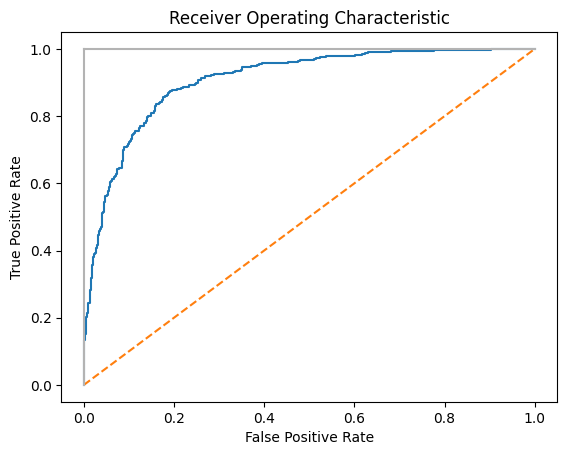

In [1]:
# If you want to evaluate a binary classifier and various probability thresholds,
# use the receiver operating characteristic (ROC) curve to evaluate the quality of the binary classifier. 
# In scikit-learn, we can use roc_curve to calculate the true and false positives at each threshold, and then plot them:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,n_features=10,n_classes=2, n_informative=3, random_state=3)
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)
# Create classifier
logit = LogisticRegression()
# Train model
logit.fit(features_train, target_train)
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,target_probabilities)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

- In many learning algorithms, the predicted values are based on `probability estimates`. That is, each observation is given an explicit probability of belonging in each class:

In [2]:
# Get predicted probabilities
# the first observation has an ~87% chance of being in the negative class (0) and a 13% chance of being in the positive class (1).
logit.predict_proba(features_test)[0:1]
# array([[0.86891533, 0.13108467]])

array([[0.8689235, 0.1310765]])

In [3]:
# We can see the classes using classes_:
logit.classes_
# array([0, 1])

array([0, 1])

> - By default, scikit-learn assumes a 50/50 chance (threshold of 0.5) of something belonging to the positive class. But sometimes, we might care more about one type of mistake over another.
> - For instance, imagine a high false positive cost (e.g., predicting someone has a disease when they don't). In that case, we'd prefer a stricter model with a higher threshold. We might miss some true positives, but when something is flagged, we're more confident it's real.
> > - This decision involves balancing two things:
> > > 1. catching true positives (TPR):
> > > > The TPR is the number of observations correctly predicted true divided by all true positive observations:<br>
> > > > $TPR=\frac{TP}{TP+FN}$ 
> > > 2. avoiding false positives (FPR):
> > > > The FPR is the number of incorrectly predicted positives divided by all true negative observations:<br>
> > > > $FPR=\frac{FP}{FP+TN}$ 

In [4]:
# The ROC curve represents the respective TPR and FPR for every probability threshold. 
# For example, in our solution a threshold of roughly 0.50 has a TPR of ~0.83 and an FPR of ~0.16:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208574
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [5]:
# if we increase the threshold to ~80% (i.e., increase how certain the model has to be before it predicts an observation as positive) 
# the TPR drops significantly but so does the FPR:
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])
# This is because our higher requirement for being predicted to be in the positive class 
# has caused the model to not identify a number of positive observations (the lower TPR) 
# but has also reduced the noise from negative observations being predicted as positive (the lower FPR).

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235


> - In addition to being able to visualize the trade-off between TPR and FPR, the ROC curve can also be used as a general metric for a model. >> - The better a model is, the higher the curve and thus the greater the area under the curve.
> >> For this reason, it is common to calculate the `area under the ROC curve (AUC ROC)` to judge the overall quality of a model at all possible thresholds.
> >> - The closer the AUC ROC is to 1, the better the model.

In [6]:
# In scikit-learn we can calculate the AUC ROC using roc_auc_score:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)
# 0.9073389355742297

0.9073429371748699

# Evaluating Multiclass Classifier Predictions
> When we have balanced classes (a roughly equal number of observations in each class of the target vector), accuracy is a simple and interpretable choice for an evaluation metric.
> > Accuracy is the number of correct predictions divided by the number of observations and works just as well in the
multiclass as in the binary setting.
> ___________________________________
> When we have imbalanced classes (a common scenario), we should be inclined to use other evaluation metrics.
>> Many of scikit-learn’s built-in metrics are for evaluating binary classifiers. However, many of these metrics can be extended for use when we have more than two classes.
>> - `Precision`, `recall`, and `F1` scores are useful metrics that we have already covered in detail in previous recipes.
>> > While all of them were originally designed for binary classifiers, we can apply them to multiclass settings by treating our data as a set of binary classes. Doing so enables us to apply the metrics to each class as if it were the only class in the data, and then aggregate the evaluation scores for all the classes by `averaging` them.

In [8]:
# If you have a model that predicts three or more classes and want to evaluate the model’s performance,
# use cross-validation with an evaluation metric capable of handling more than two classes:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')


array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [9]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')
# array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

> - In above code, `macro` refers to the method used to average the evaluation scores from the classes. The options are `macro`, `weighted`, and `micro`:
>> 1. macro:
>>> Calculate the mean of metric scores for each class, weighting each class equally.
>> 2. weighted:
>>> Calculate the mean of metric scores for each class, weighting each class proportional to its size in the data.
>> 3. micro:
>>> Calculate the mean of metric scores for each observation-class combination.
